In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [3]:
N = 3000
X = np.hstack((np.ones((N,1)),(np.random.rand(N,2)-0.5)*10))

In [4]:
b = np.array([[1],[2],[3]])

In [5]:
Y = X@b+np.random.randn(N,1)*5

C:\Users\bibek\Anaconda3\envs\bibekenv\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


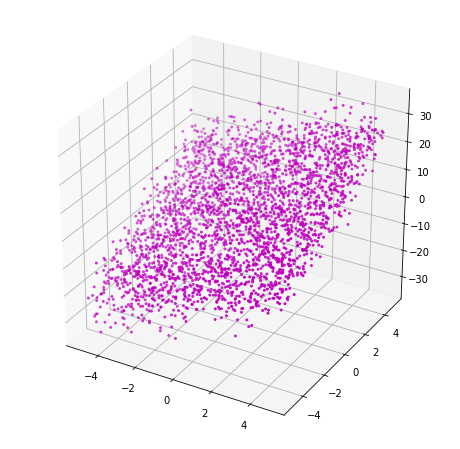

In [6]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],Y,s=4,c='m')
fig.show()

In [7]:
# normalization of data
X[:,[1,2]] = (X[:,[1,2]]-X[:,[1,2]].min(axis=0))/(X[:,[1,2]].max(axis=0)-X[:,[1,2]].min(axis=0))
X

array([[1.        , 0.23939256, 0.24516165],
       [1.        , 0.12560107, 0.72478385],
       [1.        , 0.1216818 , 0.00611952],
       ...,
       [1.        , 0.6378439 , 0.8098323 ],
       [1.        , 0.68712137, 0.3402417 ],
       [1.        , 0.29922123, 0.08598861]])

In [8]:
# random weight initialization
w = np.random.randn(3,1)
##### gradient descent
# set number of epochs and learning rate
epochs = 1000
eta = 1e-4
# create empty variable to store errors in
Errors = np.empty(epochs)
# for loop until epochs
for i in range(epochs):
    # Check error of the model now
    E = (Y-X@w).T@(Y-X@w)
    #print('Iteration = {}, Error = {}'.format(i+1,E))
    # store errors 
    Errors[i] = E
    # update model weights by stepping opposite to gradient
    grad = X.T@(X@w-Y)
    w -= eta*grad
    

Text(0, 0.5, 'Error')

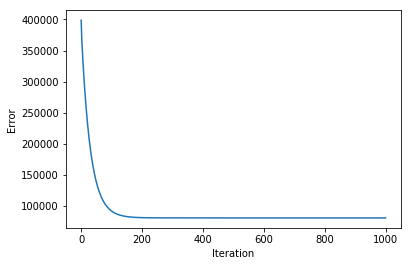

In [9]:
plt.plot(Errors)
plt.xlabel('Iteration')
plt.ylabel('Error')

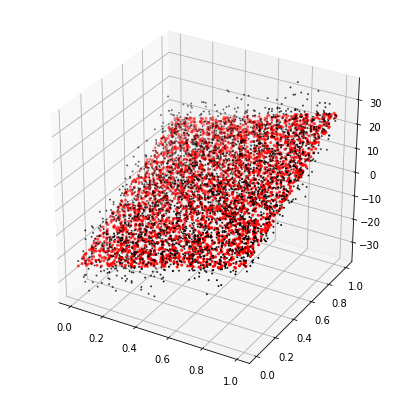

In [10]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,1],X[:,2],Y,s=1,c='k')
ax.scatter(X[:,1],X[:,2],X@w,s=4,c='r')
fig.show()

In [11]:
Rsq = 1-((Y-X@w).T@(Y-X@w))/((Y-Y.mean()).T@(Y-Y.mean()))
print('R-squared = {}'.format(Rsq[0][0]))

R-squared = 0.7981385218685301


In [14]:
b

array([[1],
       [2],
       [3]])